In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import date, timedelta
from collections import defaultdict


In [2]:
def source2country(source_list):
    country_list = []
    
    for source in source_list:
        if source in {'The New York Times', 'VOA Voice of America', 'CNN International', 'Fox News'}:
            country_list.append('United States')
        elif source in {'Agence France-Presse', 'France 24'}:
            country_list.append('France')
        elif source in {'China Daily', 'Global Times'}:
            country_list.append('China-Mainland')
        elif source in {'Hong Kong Free Press HKFP', 'South China Morning Post'}:
            country_list.append('China-HK')
        elif source in {'RT', 'Meduza', 'The Moscow Times', 'Sputnik'}:
            country_list.append('Russia')
        elif source in {'IFPnews', 'Iran daily', 'Tehran Times'}:
            country_list.append('Iran')
        elif source in {'Latin American Herald Tribune', 'Entorno Inteligente'}:
            country_list.append('Venezuela')
        elif source in {'Al Jazeera English'}:
            country_list.append('Qatar')
            
    return country_list

In [28]:
#'articles_all.json'
with open('filtered_data_v5.json', 'r') as f:
    articles, scores, labels = zip(*json.load(f))
    for article,label in zip(articles, labels):
        article['protest'] = label 
    data = pd.json_normalize(articles)
    data['source.country'] = source2country(data['source.title'])

In [19]:
data

,uri,lang,isDuplicate,date,time,dateTime,dateTimePub,dataType,sim,url,...,image,eventUri,sentiment,wgt,relevance,source.uri,source.dataType,source.title,source.country,protest
0,1207186411,eng,False,2019-08-05,14:21:00,2019-08-05T14:21:00Z,None,news,0.678431,https://www.nytimes.com/2019/08/04/world/asia/...,...,https://static01.nyt.com/images/2019/08/05/wor...,eng-4969043,-0.419608,30,30,nytimes.com,news,The New York Times,United States,Hong Kong
1,1177840309,eng,False,2019-07-01,21:37:00,2019-07-01T21:37:00Z,None,news,0.439216,https://www.nytimes.com/2019/06/30/world/asia/...,...,https://static01.nyt.com/images/2019/07/01/wor...,eng-4892521,-0.317647,29,29,nytimes.com,news,The New York Times,United States,Hong Kong
2,1281132923,eng,False,2019-10-01,22:01:00,2019-10-01T22:01:00Z,None,news,0.627451,https://www.nytimes.com/interactive/2019/world...,...,https://static01.nyt.com/images/2019/10/01/wor...,eng-5124283,-0.223529,19,19,nytimes.com,news,The New York Times,United States,Hong Kong
3,1177765280,eng,False,2019-07-01,19:34:00,2019-07-01T19:34:00Z,None,news,0.733333,https://www.nytimes.com/2019/07/01/world/asia/...,...,https://static01.nyt.com/images/2019/07/01/wor...,eng-4892521,-0.090196,19,19,nytimes.com,news,The New York Times,United States,Hong Kong
4,1177859194,eng,False,2019-07-01,22:13:00,2019-07-01T22:13:00Z,None,news,0.745098,https://www.nytimes.com/2019/07/01/world/asia/...,...,https://static01.nyt.com/images/2019/07/01/wor...,eng-4892521,-0.090196,18,18,nytimes.com,news,The New York Times,United States,Hong Kong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9185,1009167906,eng,False,2018-12-03,09:11:00,2018-12-03T09:11:00Z,None,news,0.752941,https://www.aljazeera.com/news/2018/12/hong-ko...,...,https://www.aljazeera.com/mritems/Images/2018/...,eng-4457400,0.207843,2,2,aljazeera.com,news,Al Jazeera English,Qatar,Hong Kong
9186,1008802831,eng,False,2018-12-02,19:12:00,2018-12-02T19:12:00Z,None,news,0.000000,https://www.aljazeera.com/programmes/insidesto...,...,https://www.aljazeera.com/mritems/Images/2018/...,None,-0.129412,2,2,aljazeera.com,news,Al Jazeera English,Qatar,France
9187,1002268119,eng,False,2018-11-24,10:49:00,2018-11-24T10:49:00Z,None,news,0.756863,https://www.aljazeera.com/news/2018/11/iran-ro...,...,https://www.aljazeera.com/mritems/Images/2018/...,eng-4441521,-0.223529,2,2,aljazeera.com,news,Al Jazeera English,Qatar,Iran
9188,986292042,eng,False,2018-11-04,20:04:00,2018-11-04T20:04:00Z,None,news,0.447059,https://www.aljazeera.com/news/2018/11/threate...,...,https://www.aljazeera.com/mritems/Images/2018/...,eng-4400029,-0.019608,2,2,aljazeera.com,news,Al Jazeera English,Qatar,Iran


In [20]:
data.groupby(['protest']).sentiment.mean()

protest
France      -0.202232
Hong Kong   -0.144600
Iran        -0.229530
Venezuela   -0.084713
Name: sentiment, dtype: float64

In [21]:
data.groupby(['protest', 'source.country']).sentiment.mean()

protest    source.country
France     China-HK         -0.257890
           China-Mainland   -0.206127
           France           -0.211456
           Iran             -0.230358
           Qatar            -0.202471
           Russia           -0.197612
           United States    -0.170635
           Venezuela        -0.219160
Hong Kong  China-HK         -0.060267
           China-Mainland   -0.100600
           France           -0.219119
           Iran             -0.229657
           Qatar            -0.216597
           Russia           -0.166553
           United States    -0.179283
           Venezuela        -0.178845
Iran       China-HK         -0.251176
           China-Mainland   -0.242461
           France           -0.272609
           Iran             -0.156648
           Qatar            -0.250166
           Russia           -0.242976
           United States    -0.234518
           Venezuela        -0.252883
Venezuela  China-HK         -0.073698
           China-Mainlan

In [39]:
from collections import Counter

protest_counts = Counter([article['protest'] for article in articles])
protest_counts

Counter({'Hong Kong': 3847, 'France': 1627, 'Venezuela': 1853, 'Iran': 1863})

In [40]:
country_counts = Counter(data['source.country'])
country_counts

Counter({'United States': 2276,
         'China-Mainland': 922,
         'China-HK': 962,
         'France': 1869,
         'Iran': 601,
         'Venezuela': 692,
         'Russia': 1299,
         'Qatar': 569})

In [41]:
source_counts = Counter(data['source.title'])
source_counts

Counter({'The New York Times': 783,
         'CNN International': 344,
         'VOA Voice of America': 555,
         'Fox News': 594,
         'Global Times': 125,
         'South China Morning Post': 715,
         'Hong Kong Free Press HKFP': 247,
         'China Daily': 797,
         'France 24': 760,
         'Agence France-Presse': 1109,
         'Iran daily': 316,
         'Tehran Times': 203,
         'IFPnews': 82,
         'Entorno Inteligente': 253,
         'Latin American Herald Tribune': 439,
         'Sputnik': 897,
         'RT': 395,
         'The Moscow Times': 6,
         'Meduza': 1,
         'Al Jazeera English': 569})

In [46]:
def dictToLatexTable(counter):
    table = []
    for key, item in counter.items():
        printable_items = [str(key)]
        if isinstance(item, list):
            printable_items += item
        elif isinstance(item,str) or isinstance(item, float) or isinstance(item, int):
            printable_items.append(str(item).strip())
        else:
            raise "Invalid type passed"

        print_str = ' & '.join(printable_items) + '\\\\'
        table.append(print_str)
    return table
                
source_table = dictToLatexTable(source_counts)
country_table = dictToLatexTable(country_counts)
protest_table = dictToLatexTable(protest_counts)
[print(line) for line in source_table]
print('--------------------------------------------------')
[print(line) for line in country_table]
print('--------------------------------------------------')
[print(line) for line in protest_table]
print('--------------------------------------------------')

The New York Times & 783\\
CNN International & 344\\
VOA Voice of America & 555\\
Fox News & 594\\
Global Times & 125\\
South China Morning Post & 715\\
Hong Kong Free Press HKFP & 247\\
China Daily & 797\\
France 24 & 760\\
Agence France-Presse & 1109\\
Iran daily & 316\\
Tehran Times & 203\\
IFPnews & 82\\
Entorno Inteligente & 253\\
Latin American Herald Tribune & 439\\
Sputnik & 897\\
RT & 395\\
The Moscow Times & 6\\
Meduza & 1\\
Al Jazeera English & 569\\
--------------------------------------------------
United States & 2276\\
China-Mainland & 922\\
China-HK & 962\\
France & 1869\\
Iran & 601\\
Venezuela & 692\\
Russia & 1299\\
Qatar & 569\\
--------------------------------------------------
Hong Kong & 3847\\
France & 1627\\
Venezuela & 1853\\
Iran & 1863\\
--------------------------------------------------


In [22]:
protests_by_dates = data[['protest', 'source.country']]
protests_by_dates.loc[:,'date'] = pd.to_datetime(data.loc[:,'date'])

/home/felixlabelle3/anaconda3/envs/ethics_project/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/felixlabelle3/anaconda3/envs/ethics_project/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


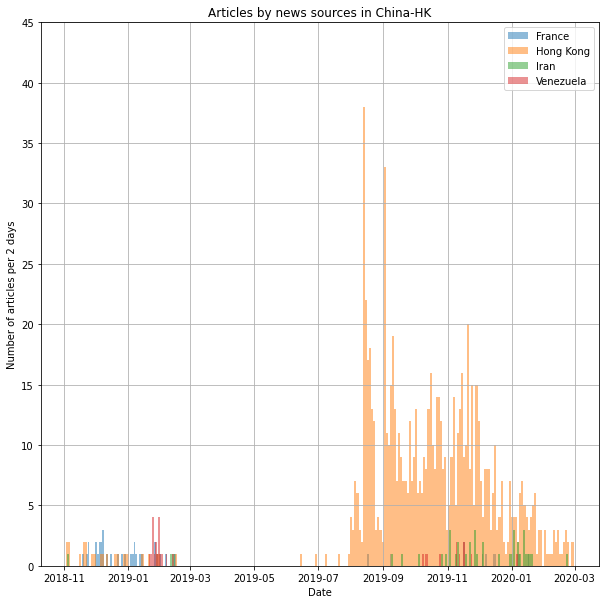

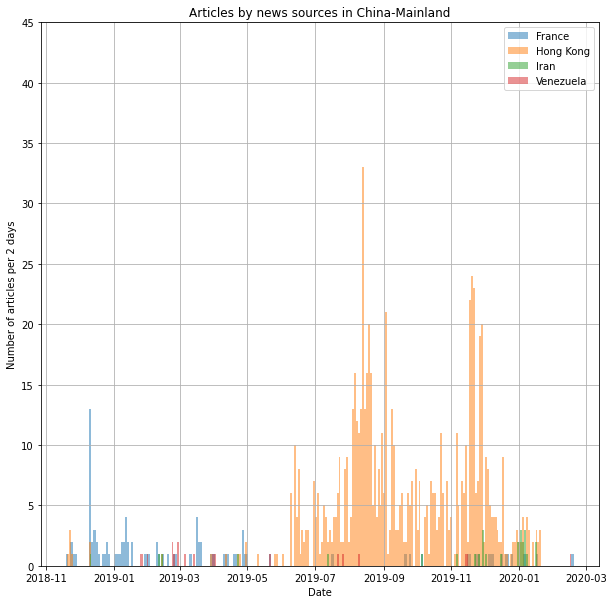

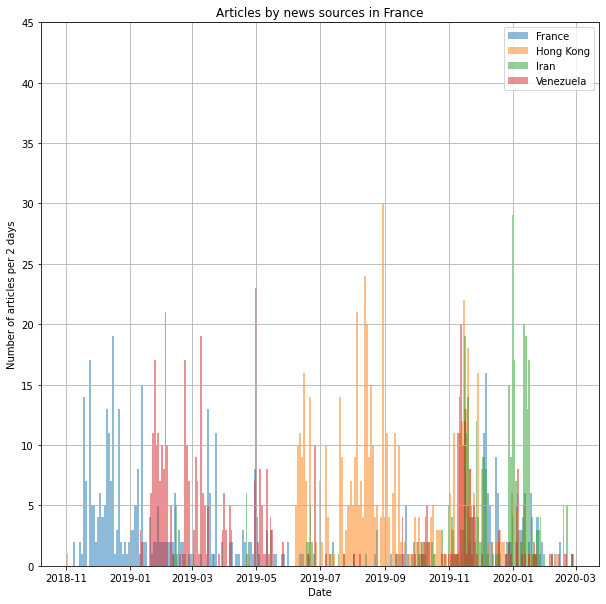

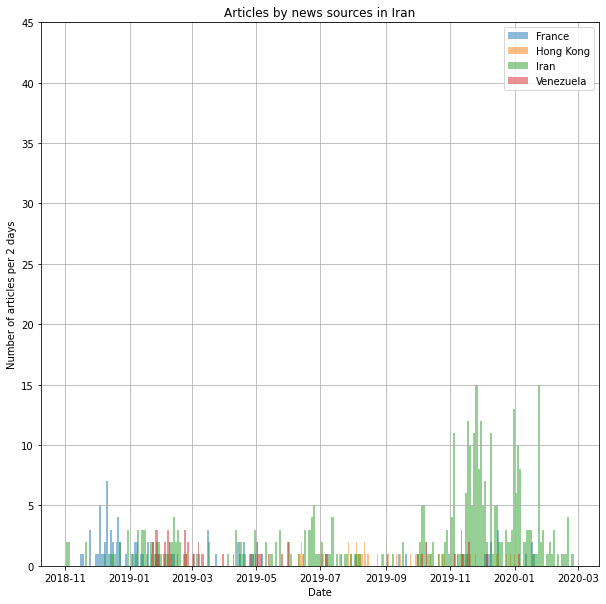

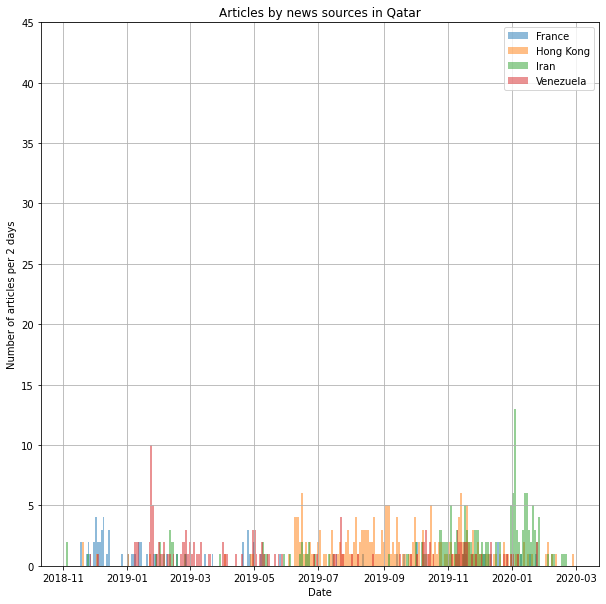

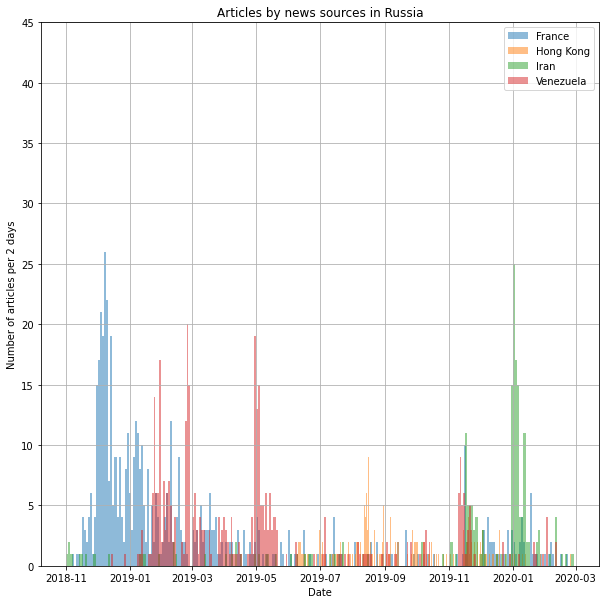

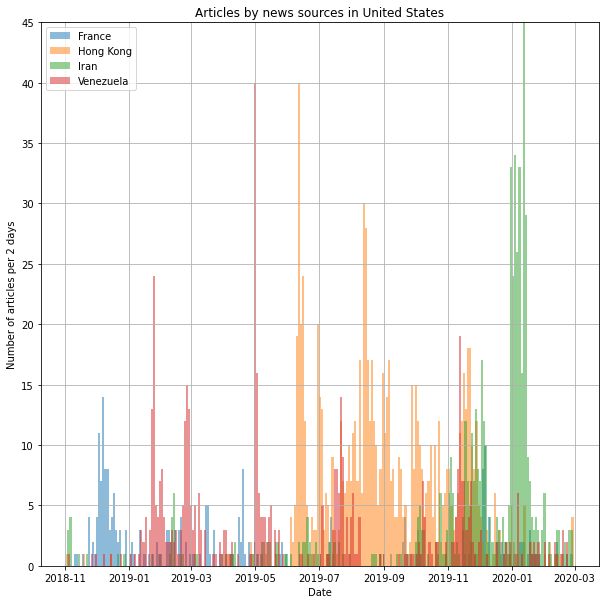

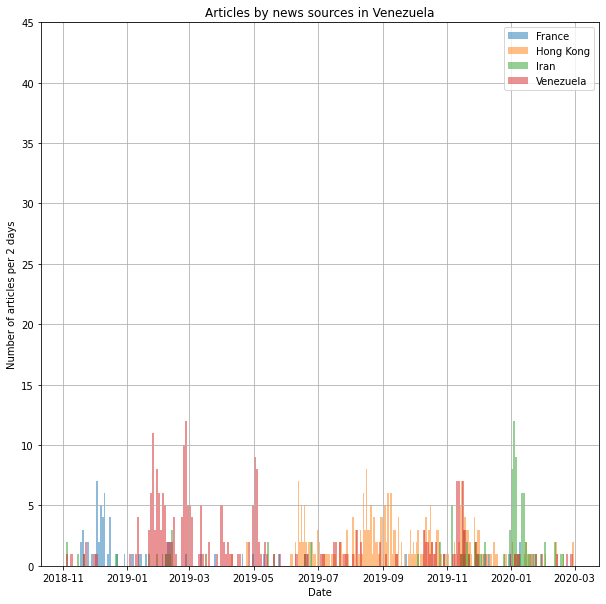

In [33]:
for source_country in sorted(set(data['source.country'])):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Articles by news sources in '+source_country)
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of articles per 2 days')
    for label, df in protests_by_dates[protests_by_dates['source.country']==source_country].groupby('protest'):
        df.date.hist(ax=ax, label=label, bins=243, alpha=0.5)
        plt.legend()
        plt.ylim((0,45))
    plt.show()
    fig.savefig("news-source_graph_{}.png".format(source_country.replace(' ','')))

In [26]:
locations = ['Venezuela', 'France', 'Hong Kong', 'Iran']
sources = {
    'us': ['nytimes.com', 'cnn.com', 'voanews.com', 'foxnews.com'], 
    'china': ['globaltimes.cn', 'scmp.com', 'hongkongfp.com', 'chinadaily.com.cn'], # china news ecns.cn, shine.cn
    'france': ['france24.com', 'afp.com'],
    'iran': ['iran-daily.com', 'tehrantimes.com', 'ifpnews.com'],
    'venezuela': ['entornointeligente.com', 'laht.com'],
    'russia': ['sputniknews.com', 'rt.com', 'themoscowtimes.com', 'meduza.io'], # therussophile.org has 2.3M articles
    'qatar': ['aljazeera.com']
}
dates = {
    'Venezuela': {'date_start': '2019-01-01', 'date_end': '2019-11-30'},
    'France': {'date_start': '2018-11-01', 'date_end': '2019-03-31'},
    'Hong Kong': {'date_start': '2019-06-01', 'date_end': '2019-12-31'},
    'Iran': {'date_start': '2019-11-01', 'date_end': '2020-02-29'}
}
date_start = '2018-11-01'
date_end = '2020-02-29'
protest_key_words = set([
    'protest', 'protesters', 'protester',
    'demonstration', 'demonstrations', 'demonstrators', 'demonstrator',
    'clash', 'clashes', 'skirmish', 'skirmishes',
    'riot', 'riots',
    'barricades', 'barricade', 'barricaded', 'roadblock',
    'tear', 'gas',
    'unrest', 'unrests',
    'revolt',
    'upheaval', 'turmoil', 'agitation', 'agitate',
    'uproar',
    'resist', 'resisted', 'arrested', 'arrests',
    'manifestation', 'manifestations',
    'police', 'officers', 'officer', 'force', 'forces',
])
# Removed long (HK), yellow(France), avenue (France), latin (Venezuela)
protest_specific_key_words = {
'Venezuela':['maduro', 'guaido', 'venezuela', 'caracas', 'venezuelan', 'juan', 'venezuelans', 'nicolas', 'lopez', 'chavez', 'cabello', 'leopoldo', 'diosdado', 'hyperinflation', 'shortages', 'cucuta', 'hugo', 'padrino'],
'France':['paris', 'macron', 'gilets', 'jaunes', 'jaune', 'gilet', 'french', 'france', 'champs', 'elysees', 'vest', 'vests', 'arc', 'triomphe', 'emmanuel', 'christophe', 'castaner', 'jackets', 'philippe', 'elysee', 'marseille', 'michel', 'edouard', 'lyon'],
'Hong Kong':['hong', 'kong', 'china', 'lam', 'chinese', 'extradition', 'beijing', 'mainland', 'carrie', 'wong', 'yuen', 'cheung', 'chan', 'communist', 'xi', 'kowloon', 'xinjiang', 'kongers', 'chinese'],
'Iran':['iran', 'iranian', 'tehran', 'soleimani', 'khamenei', 'irgc', 'ali', 'ayatollah', 'fadavi', 'drone', 'iranians', 'irbil', 'erbil', 'rouhani', 'mousavi', 'khuzestan', 'persian', 'zarif']
}
colors = {
    'us': {'nytimes.com':'forestgreen', 
           'cnn.com':'seagreen',
           'voanews.com':'mediumseagreen',
           'foxnews.com':'green' },
    'china': {'globaltimes.cn':'greenyellow',
              'scmp.com':'chartreuse', 
              'hongkongfp.com':'lawngreen', 
              'chinadaily.com.cn':'lime'}, # china news ecns.cn, shine.cn
    'france': {'france24.com':'gold', 
               'afp.com':'orange'},
    'iran': {'iran-daily.com':'aqua', 
             'tehrantimes.com':'cyan', 
             'ifpnews.com':'darkturquoise'},
    'venezuela': {'entornointeligente.com':'red', 
                  'laht.com':'tomato'},
    'russia': {'sputniknews.com':'dimgray', 
               'rt.com':'gray', 
               'themoscowtimes.com':'darkgray', 
               'meduza.io':'silver'}, # therussophile.org has 2.3M articles
    'qatar': {'aljazeera.com':'pink'}
}
colors_array = [colors[source_origin][source] for source_origin in colors for source in colors[source_origin] ]
source_array = [source for source_origin in sources for source in sources[source_origin]]
bin_size_protest = {
    'Venezuela':10, 
    'France':3, 
    'Hong Kong':5, 
    'Iran':5
}

In [29]:
articles_location = dict()
for location in locations:
    articles_location[location] = [article for article in articles if article['protest'] == location]

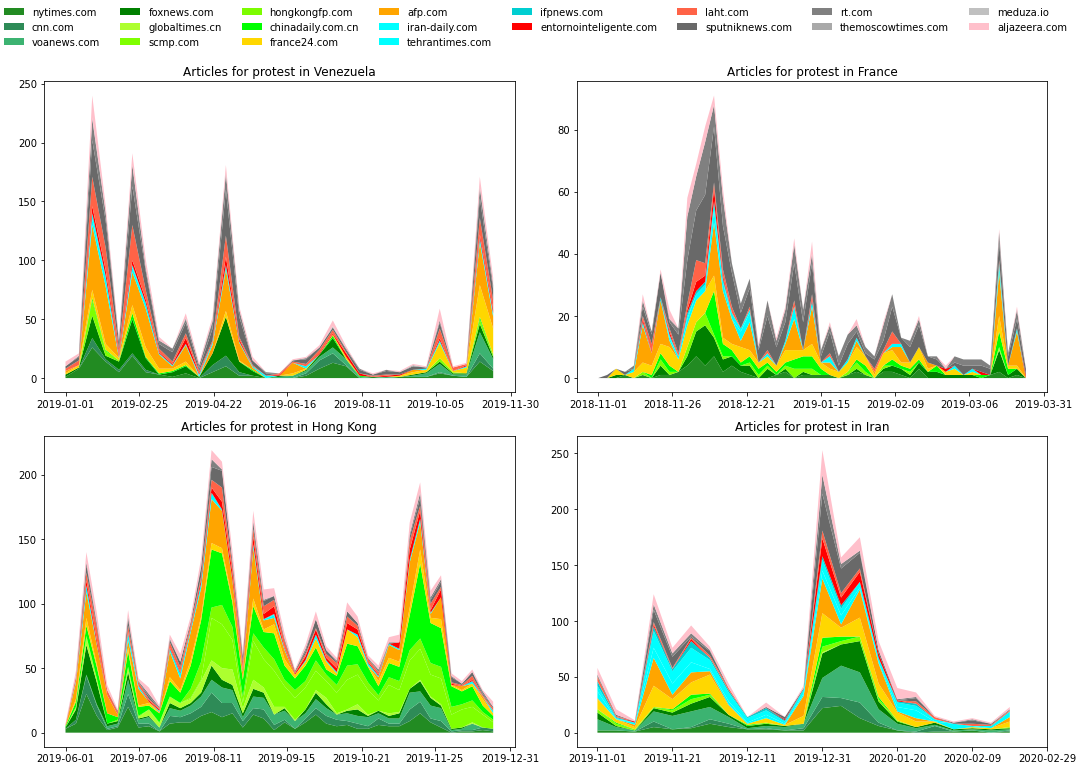

In [32]:
fig = plt.figure(figsize=(15, 10))
for idx,location in enumerate(locations):
    start_date = date.fromisoformat(dates[location]['date_start'])
    end_date = date.fromisoformat(dates[location]['date_end'])
    bins = np.arange(start_date, end_date, step=bin_size_protest[location])
    y = []
    for source_origin in sources:
        for source in sources[source_origin]:
            extract_dates = [date.fromisoformat(article['date']) for article in articles_location[location] if article['source']['uri'] == source]
            y.append(np.histogram(extract_dates, bins=bins)[0])
    x = np.histogram(extract_dates, bins=bins)[1]
    y_stack = np.row_stack(y)
    y_stack = np.concatenate([np.zeros((1, y_stack.shape[1])), y_stack], axis=0)
    y_cum = np.cumsum(y_stack, axis=0)

    ax = fig.add_subplot(2, 2, idx+1)
    for i in range(y_stack.shape[0]-1):
        ax.fill_between(x[:-1], y_cum[i,:], y_cum[i+1,:], facecolor=colors_array[i], label=source_array[i])
    ax.set_title('Articles for protest in {}'.format(location))
    xticks = np.linspace(pd.Timestamp(start_date).value, pd.Timestamp(end_date).value, 7)
    xticks = [elt.date() for elt in pd.to_datetime(xticks)]
    ax.set_xticks(xticks)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', bbox_to_anchor= (0.0, 1.), ncol=8,
            borderaxespad=0, frameon=False)
# plt.subplots_adjust(wspace=0.1, hspace=0.15)
plt.tight_layout()
# plt.show()
plt.savefig('protests_source_timelines.png',dpi=200, bbox_inches='tight')


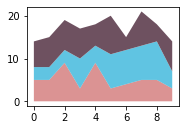

In [31]:
# just create some random data
fnx = lambda : np.random.randint(3, 10, 10)
y = np.row_stack((fnx(), fnx(), fnx()))   
# this call to 'cumsum' (cumulative sum), passing in your y data, 
# is necessary to avoid having to manually order the datasets
x = np.arange(10) 
y_stack = np.cumsum(y, axis=0)   # a 3x10 array

fig = plt.figure()
ax1 = fig.add_subplot(221)

ax1.fill_between(x, 0, y_stack[0,:], facecolor="#CC6666", alpha=.7)
ax1.fill_between(x, y_stack[0,:], y_stack[1,:], facecolor="#1DACD6", alpha=.7)
ax1.fill_between(x, y_stack[1,:], y_stack[2,:], facecolor="#6E5160")

plt.show()

In [110]:
x[:-1].shape

(48,)

In [81]:
np.concatenate((np.zeros((1, 10)), y), 0)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [7., 7., 6., 7., 9., 4., 6., 5., 6., 6.],
       [5., 9., 5., 9., 6., 6., 7., 3., 4., 9.],
       [8., 9., 7., 9., 6., 3., 8., 5., 3., 4.]])

In [51]:
len(articles_location['Venezuela'])

1967

In [42]:
len([date.fromisoformat(article['date']) for article in articles_location[location]])

1967

In [47]:
sum([  5,  23,  22, 177, 137,  82,  30, 142, 100,  67,  35,  12,  41,
         45,  23,  13,  18, 203,  52,  50,  19,  13,   8,  11,   8,  11,
         26,   3,  18,  15,   5,  24,   8,   4,   8,  13,  11,   8,  11,
          4,  26,  18,  24,   9,  46,  70,  36])

1734